# Map interface

In [1]:
import geomappy as mp
from geomappy.plotting.basemap import ProjectCustomExtent
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.crs as ccrs

In [2]:
water_table_depth = mp.Map("data/wtd.tif")

to visualise where the data is located

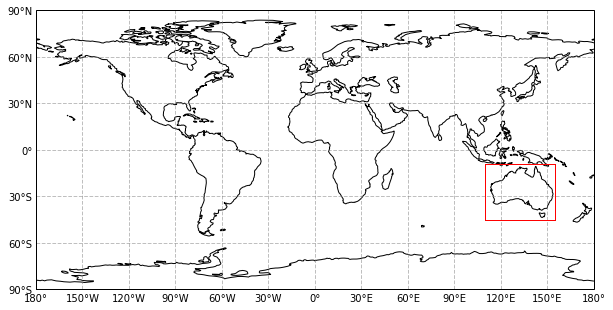

In [3]:
water_table_depth.plot_world()

splitting the data up in four tiles:

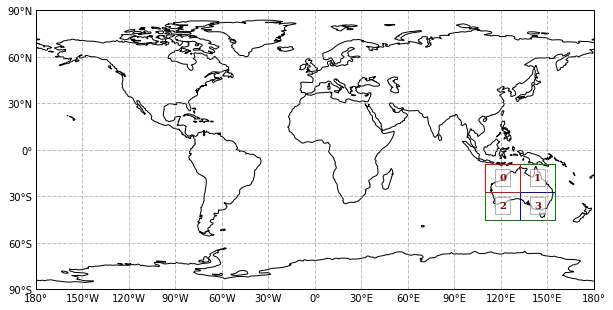

In [4]:
water_table_depth.tiles=4
water_table_depth.plot_world(numbers=True)

obtain the data in the third tile:

In [5]:
water_table_depth[2]

array([[         nan,          nan,          nan, ..., 139.19279774,
        172.89997711, 143.0685893 ],
       [         nan,          nan,          nan, ...,  98.68009461,
        146.66971847, 110.82627604],
       [         nan,          nan,          nan, ..., 153.90249485,
        105.89761196, 134.27939269],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

or in specific bounds

In [6]:
water_table_depth[(120, -30, 130, -20)] #x0, y0, x1, y1

array([[29.84664683, 21.34737163, 15.97619593, ..., 23.33104448,
        21.08796826, 19.33318074],
       [26.4133669 , 19.88250553, 15.39635309, ..., 21.57625696,
        20.08087282, 18.70756085],
       [20.11139086, 17.50209812, 15.77782864, ..., 19.9282826 ,
        18.84489204, 18.24979019],
       ...,
       [64.56092164, 58.71671626, 57.69436179, ..., 19.85198749,
        20.05035477, 20.32501717],
       [69.00129702, 64.43884947, 67.49065385, ..., 19.74517433,
        19.63836118, 20.17242695],
       [77.89730678, 71.97680629, 73.16700999, ..., 21.71358816,
        20.56916152, 20.78278782]])

and this location can also be visualised on the global map using the same indices:

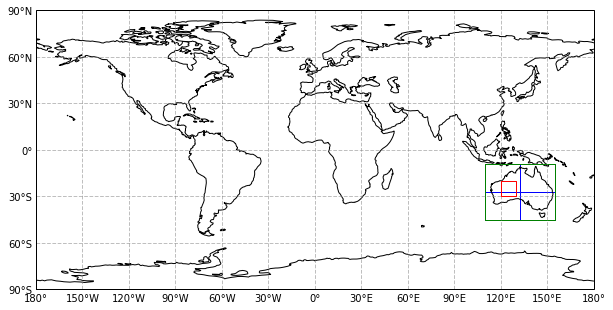

In [7]:
water_table_depth.plot_world((120, -30, 130, -20))

Displaying only the location of the file itself

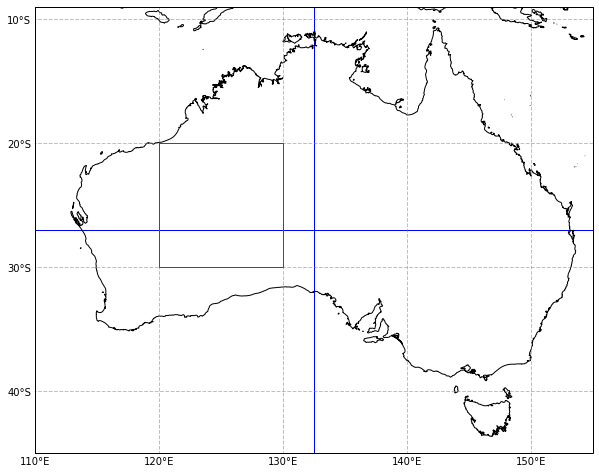

In [8]:
water_table_depth.plot_file(xticks=10, yticks=10, resolution='10m')

## Visualising the data

(<matplotlib.axes._subplots.AxesSubplot at 0x105bf27b8>,
 <matplotlib.colorbar.Colorbar at 0xb24000f28>)

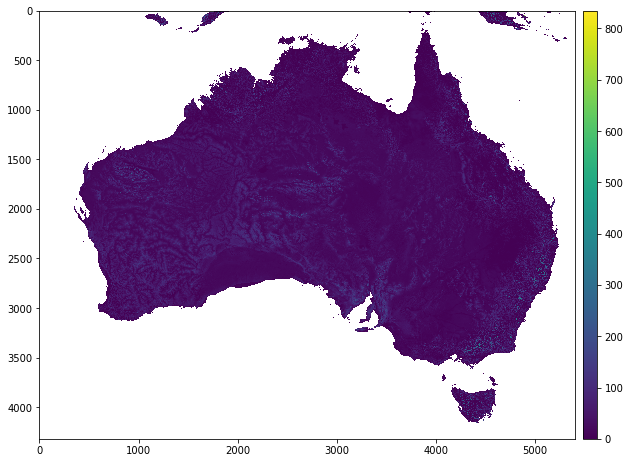

In [9]:
water_table_depth.plot_map()

This can be enhanced by adding a basemap

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb1fd9df98>,
 <matplotlib.colorbar.Colorbar at 0xb238c7c50>)

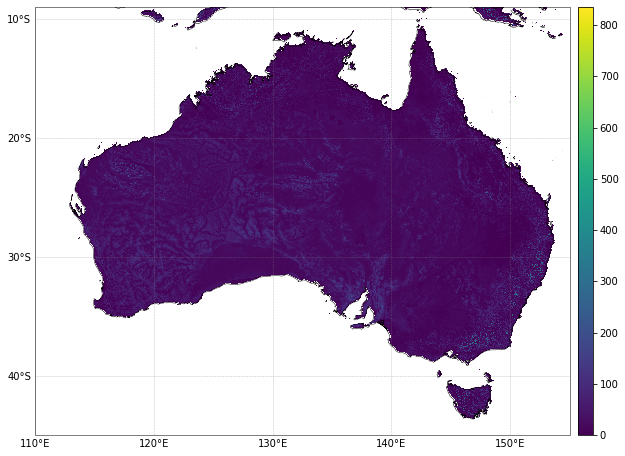

In [10]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5})

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb240ca9e8>,
 <matplotlib.colorbar.Colorbar at 0xb241755c0>)

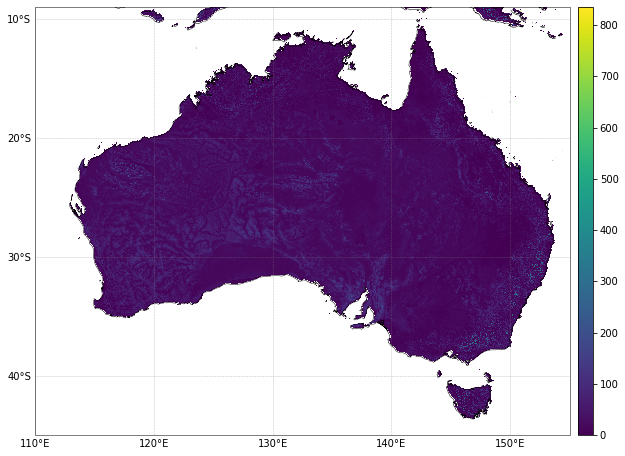

In [11]:
# Depending on the matplotlib version the default interpolation might not be the best here. 
# `nearest` often works best.
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, interpolation='none')

the standard `matplotlib` parameters for `plt.imshow` work here as well

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1028ff2b0>,
 <matplotlib.colorbar.Colorbar at 0xb25de2cf8>)

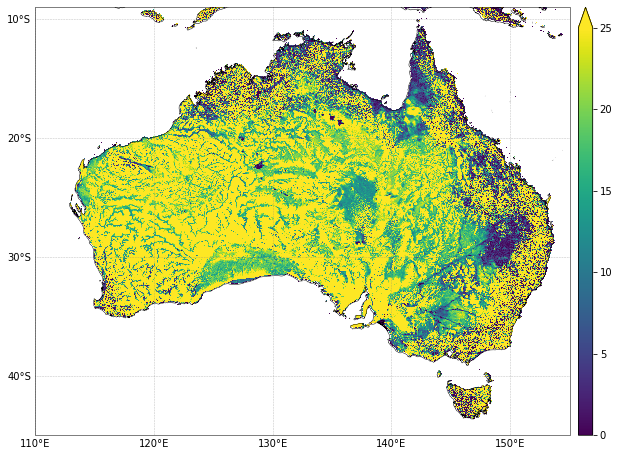

In [12]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, vmax=25)

As most values are quite close to 0, a more interesting map can be made by using the ``bin`` parameter

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb25dbf668>,
 <matplotlib.colorbar.Colorbar at 0xb25d82c18>)

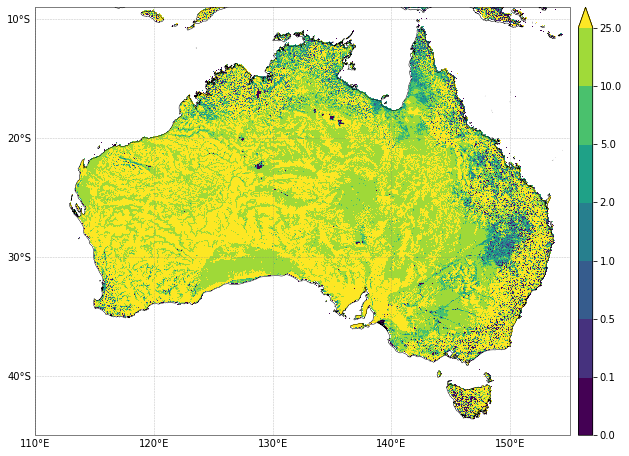

In [13]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25])

And by specifiying a more intuitive `cmap`

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb23b55358>,
 <matplotlib.colorbar.Colorbar at 0xb23b103c8>)

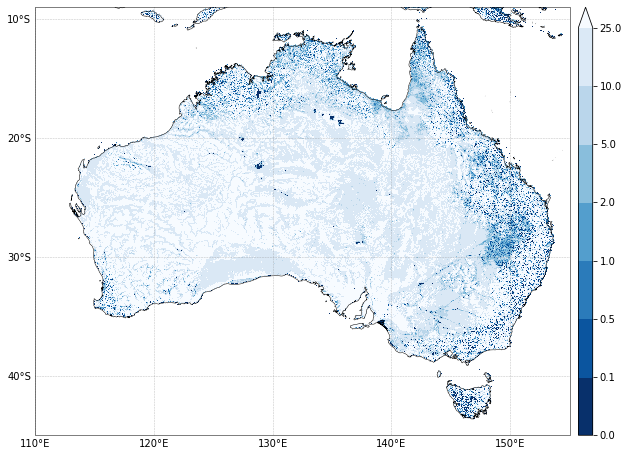

In [14]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25],
                           cmap="Blues_r")

you can also choose to have a legend instead of a colorbar

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2626b710>,
 <matplotlib.legend.Legend at 0xb264dc8d0>)

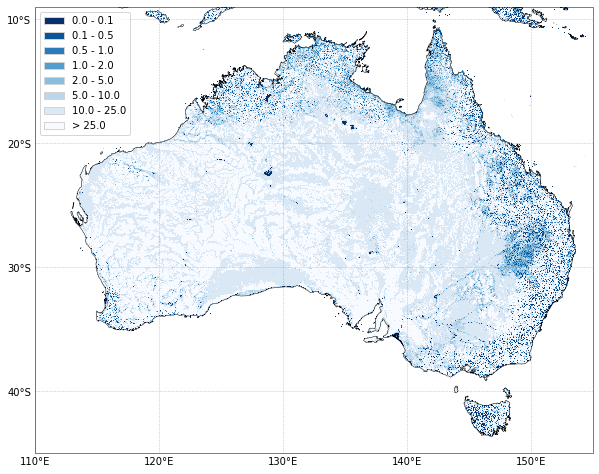

In [15]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25],
                           cmap="Blues_r", legend='legend', legend_kwargs={'loc':2})

Or none at all

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb26520438>, None)

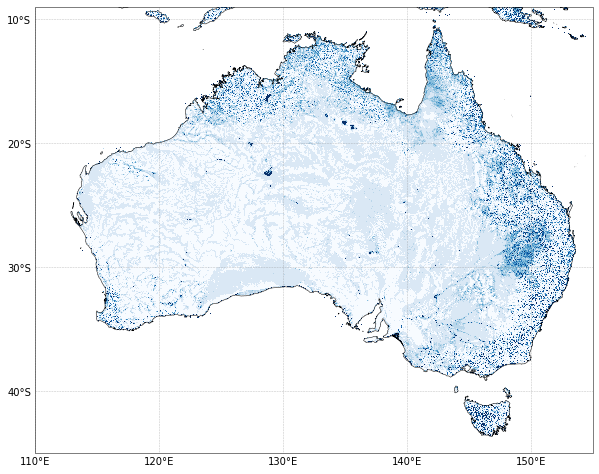

In [16]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25], 
                           cmap="Blues_r", legend=False)

maybe with a slightly different sea color

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb26753ac8>, None)

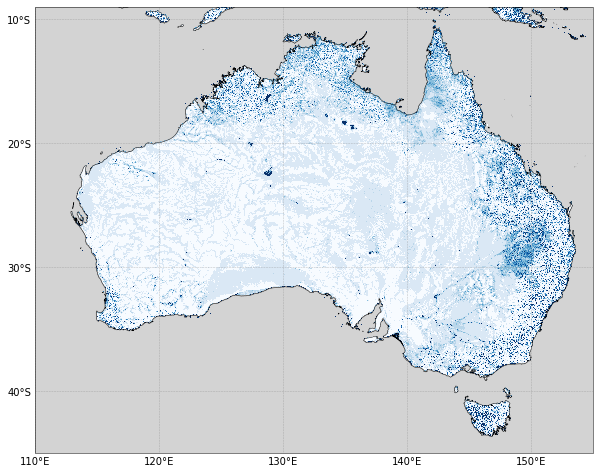

In [17]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25], 
                           cmap="Blues_r", legend=False, nan_color="lightgrey")

Or with a horizontal 'shrunken' colorbar

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2698eac8>,
 <matplotlib.colorbar.Colorbar at 0xb262207f0>)

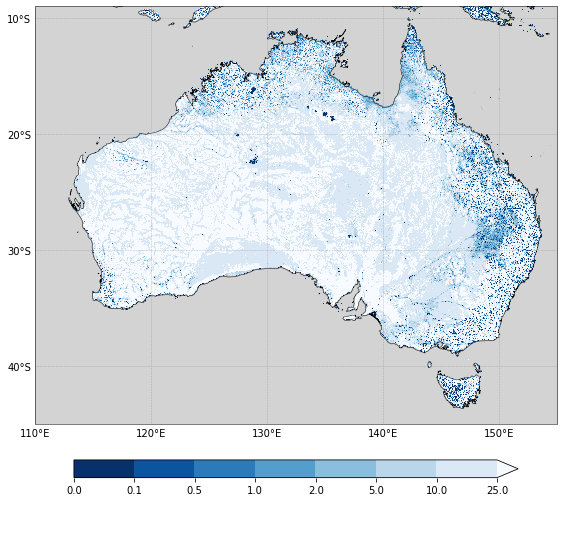

In [18]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25], 
                           cmap="Blues_r", nan_color="lightgrey", pad_fraction=2, aspect=20,
                           legend_kwargs={'position':'bottom', 'shrink':0.85})

A similar indexing approach as shown on the world maps is possible with the data as well:

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2706c240>, None)

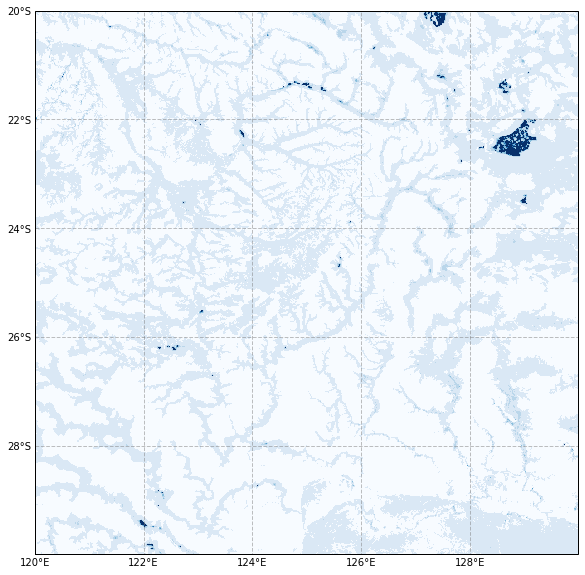

In [19]:
water_table_depth.plot_map(ind=(120, -30, 130, -20), basemap=True, 
                           xticks=2, yticks=2, resolution='10m',
                           bins=[0,0.1,0.5,1,2,5,10,25], cmap="Blues_r", legend=False)

To build these plots outside the class structure for more specific control the functions are exposed separataly

In [20]:
data = water_table_depth[(120, -30, 130, -20)]

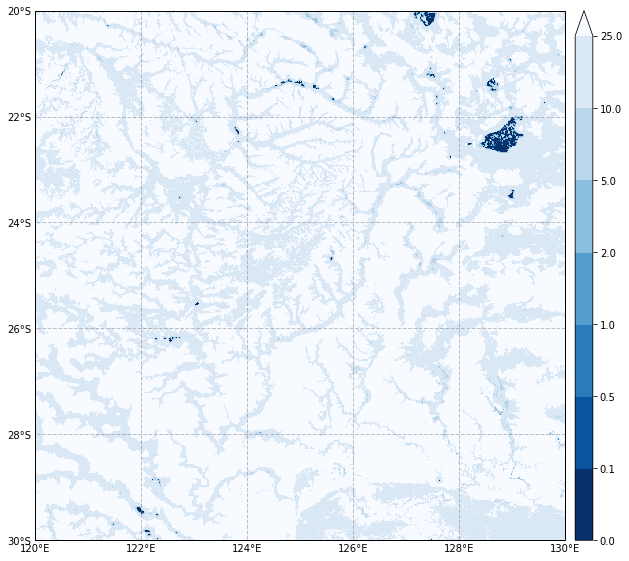

In [21]:
# create the basemap
ax = mp.basemap(x0=120,x1=130,y0=-30,y1=-20, xticks=2, yticks=2)
# call the plotting function
mp.plot_map(data, bins=[0,0.1,0.5,1,2,5,10,25], ax=ax, legend=False, cmap="Blues_r")
# add the colorbar separately
mp.add_colorbar(ax.images[-1], extend='max')

## Another example, from EFAS
NetCDF file with 12 layers in a different projection. Here you can see the real indexing power of the package. Note that an EPSG code needs to be provided as rasterio can't pick up on the CRS of the file.

In [22]:
nc = mp.Map("data/dis_2019_monthlymeans_cropped_complete.nc", tiles=(2,2), epsg=3035)

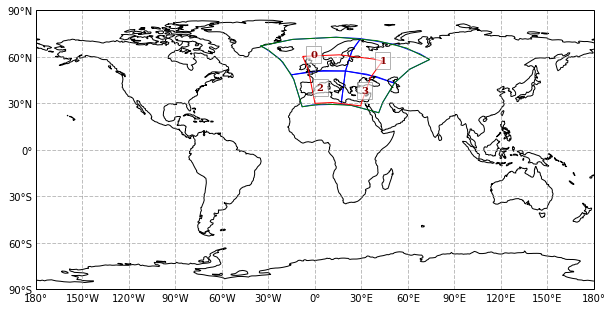

In [23]:
nc.plot_world((0,30,30,60), numbers=True)

or with it's natural projection

IllegalArgumentException: RobustDeterminant encountered non-finite numbers 


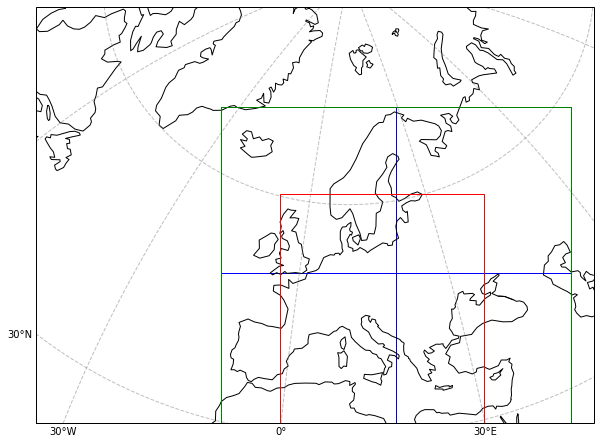

In [24]:
nc.plot_world(epsg=3035)

IllegalArgumentException: RobustDeterminant encountered non-finite numbers 


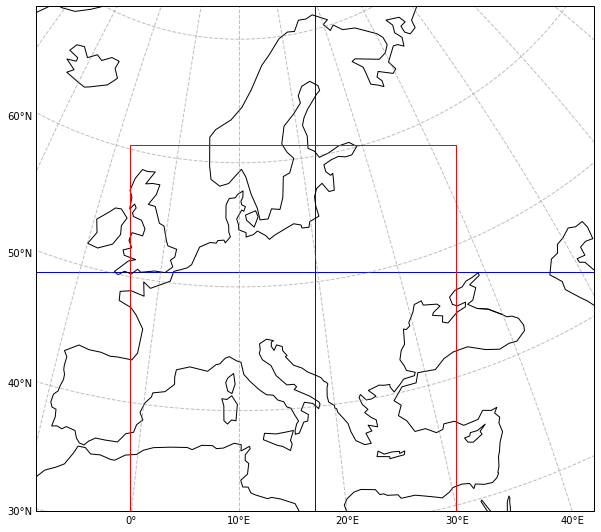

In [25]:
ax = nc.plot_file(xticks=10, yticks=10)

Get the shape of the file to see the structure

In [26]:
nc.shape

(950, 1000, 12)

this means that some indexing can be done. For example plotting the first layer and the sixth layer

IllegalArgumentException: RobustDeterminant encountered non-finite numbers 


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2b8056a0>,
 <matplotlib.colorbar.Colorbar at 0xb2e4376d8>)

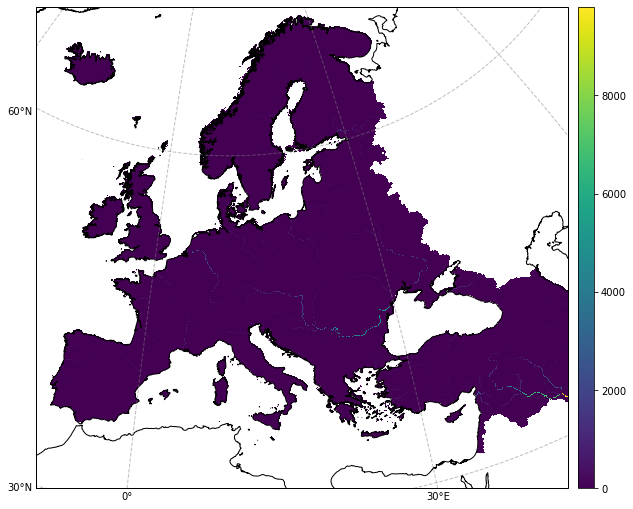

In [27]:
nc.plot_map(layers=1, basemap=True, resolution="10m")

IllegalArgumentException: RobustDeterminant encountered non-finite numbers 


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb23b32dd8>,
 <matplotlib.colorbar.Colorbar at 0xb2ed7e3c8>)

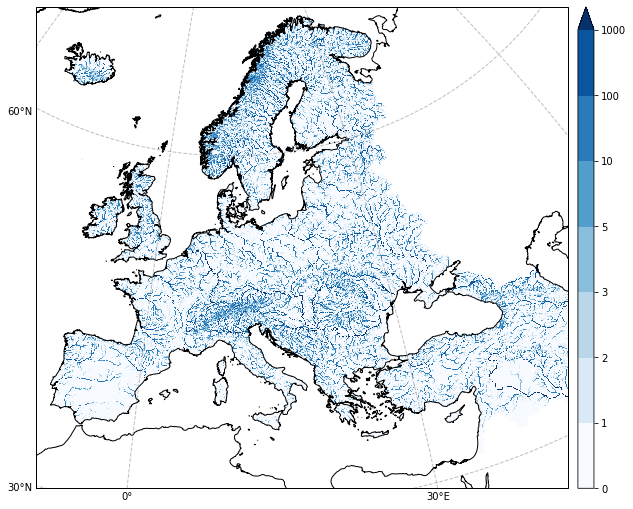

In [28]:
# more useful cmap and bins
nc.plot_map(layers=6, basemap=True, resolution="10m",
            bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

Or cast it to a different projection

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2ee01fd0>,
 <matplotlib.colorbar.Colorbar at 0xb2bb52550>)

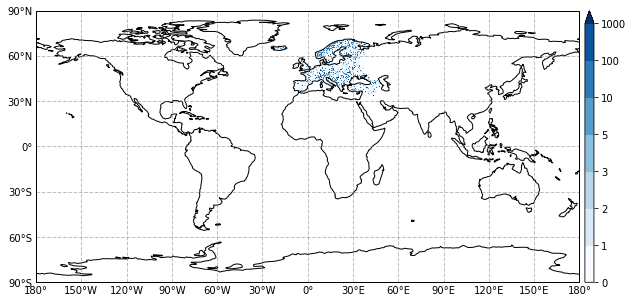

In [29]:
nc.plot_map(layers=6, basemap=True, epsg=4326, bounds="global",
            bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

Cut it to the required bounds

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2edc5400>,
 <matplotlib.colorbar.Colorbar at 0xb2bc07ba8>)

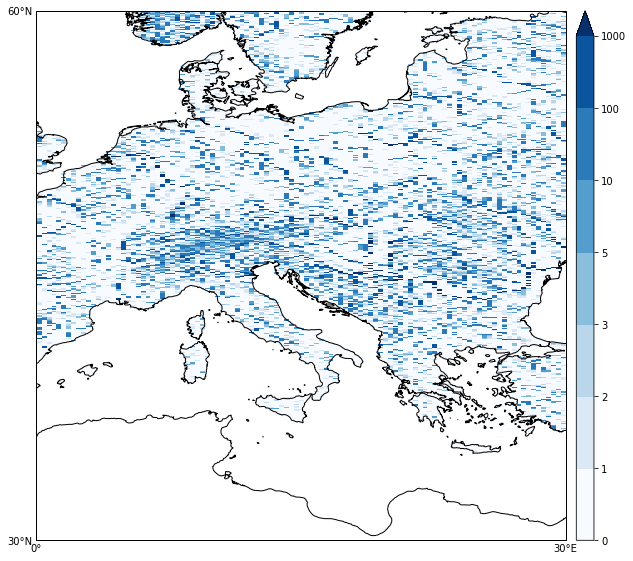

In [30]:
# Be aware that plotting data on a different projection does not always work fantastically
nc.plot_map(layers=6, basemap=True, resolution="10m", epsg=4326, bounds=(0,30,30,60),
            bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

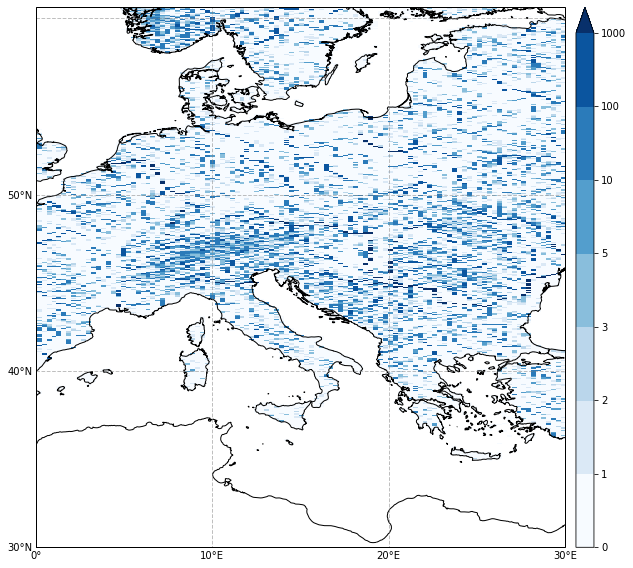

In [31]:
ax, legend = nc.plot_map(ind=(0,30,30,60), layers=6, basemap=True, resolution="10m", epsg=4326, 
                         xticks=10, yticks=10, bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

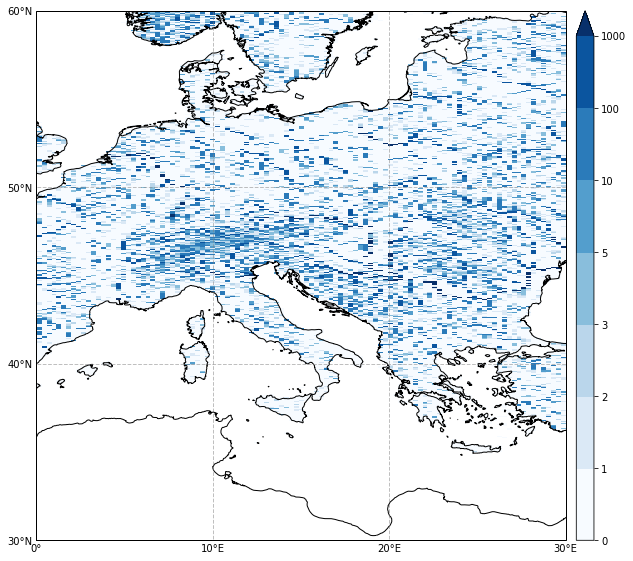

In [32]:
# The same plot can be made while using the outer functions, with more control
data = nc[(0,30,30,60), 6]
ax = mp.basemap(*(0,30,30,60), xticks=10, yticks=10, resolution='10m')
bounds = nc.get_bounds((0,30,30,60))
bounds = [bounds[0], bounds[2], bounds[1], bounds[3]]
ax, legend = mp.plot_map(data, ax=ax, extent=bounds, transform=nc._transform,
                         bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

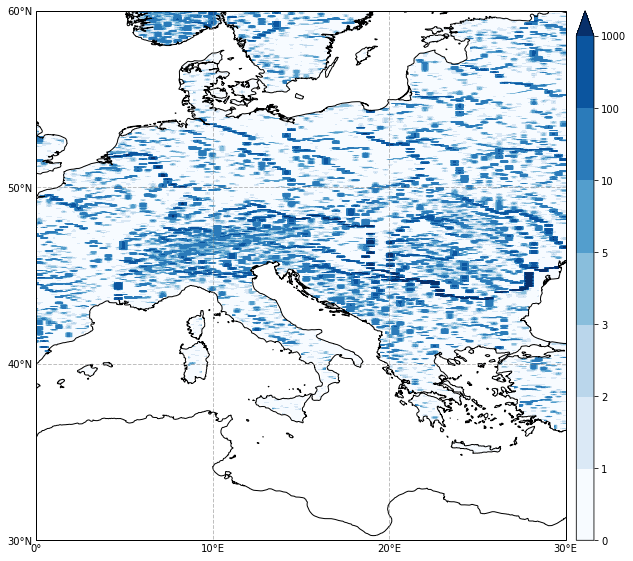

In [33]:
# Different interpolation mechanisms to make things look better
data = nc[(0,30,30,60), 6]
ax = mp.basemap(*(0,30,30,60), xticks=10, yticks=10, resolution='10m')
bounds = nc.get_bounds((0,30,30,60))
bounds = [bounds[0], bounds[2], bounds[1], bounds[3]]
ax, legend = mp.plot_map(data, ax=ax, extent=bounds, transform=nc._transform, interpolation='hermite',
                         bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

IllegalArgumentException: RobustDeterminant encountered non-finite numbers 


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2bcb68d0>,
 <matplotlib.colorbar.Colorbar at 0xb30de5828>)

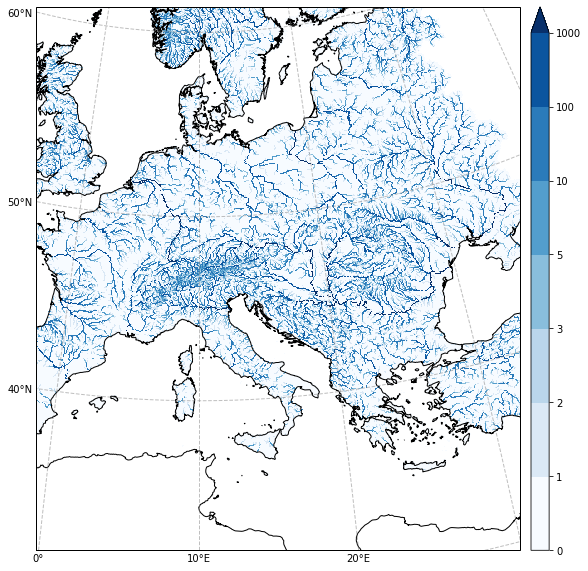

In [34]:
# but it does work fine in the original projection. It corresponds to the red square on the global map
# as seen previously.
nc.plot_map(ind=(0,30,30,60), layers=6, basemap=True, resolution="10m", epsg=3035, xticks=10, yticks=10,
            bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

To layers are numbered 1 to n, which is sligthly confusing, but the default in rasterio.
To access different layers at a time (or several) the indexing notation can be used.
The following example load the 2nd, 3rd and 4th layer from the file. The first indexer is the same as above, it contains information on either extent (-180,-90,180,90), tile (0 to 3) or a slice that combines tiles. None takes all the data that is there on the first two dimensions

In [35]:
nc[None, (2,3,4)].shape

(950, 1000, 3)

A trick to plot different layers as RGB can be done in the following way. It looks quite spacy on this data, but on satellite data this might be quite useful.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0xb2bd753c8>, None)

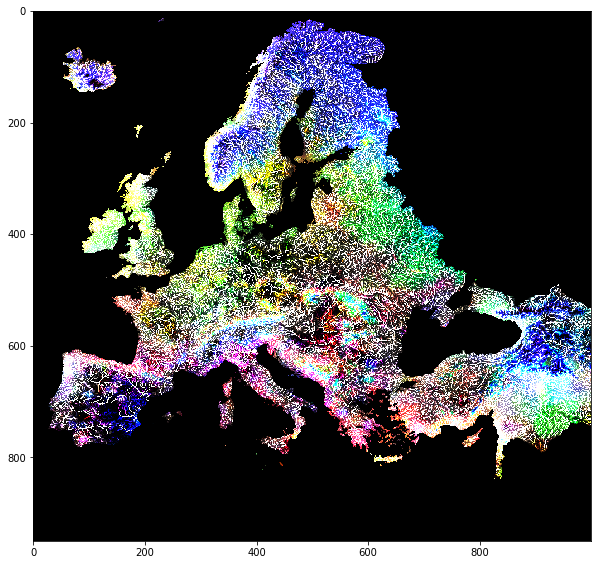

In [36]:
nc.plot_map(layers=(2,3,4))

Most functions described in this example document can work on different layers. They use the first layer by default.

## Classified maps

this plotting routine works with continuous data but is slightly different with categorical data
in the following example, climate maps are shown which are stored as integer values in the raster

(<matplotlib.axes._subplots.AxesSubplot at 0xb2eda1ba8>,
 <matplotlib.colorbar.Colorbar at 0xb2e7930f0>)

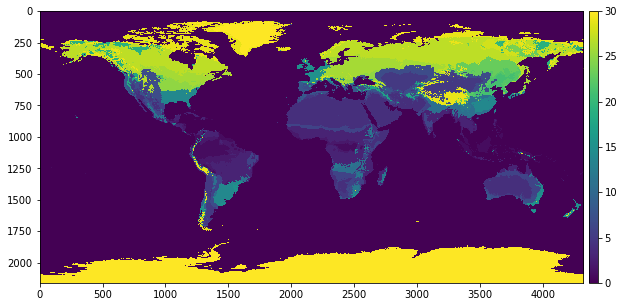

In [37]:
climate = mp.Map("data/climate_downsampled_10_display.tif")
climate.plot_map()

to show this in a better way, with the correct labels and colors (from the paper) the function
plot_classified_maps is implemented, which works similary to plot_maps above, but requires ``colors`` 
and ``labels``

In [38]:
colors = [(1, 1, 1)]
bins = [0]
labels = ["Water"]
with open("data/koppen_legend.txt") as f:
    for line in f:
        line = line.strip()
        try:
            int(line[0])
            rgb = [int(c) / 255 for c in line[line.find('[') + 1:-1].split()]
            colors.append(rgb)
            labels.append(line.split()[1])
            bins.append(int(line[:line.find(':')]))
        except:
            pass

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2e6527f0>,
 <matplotlib.legend.Legend at 0xb2c0d8048>)

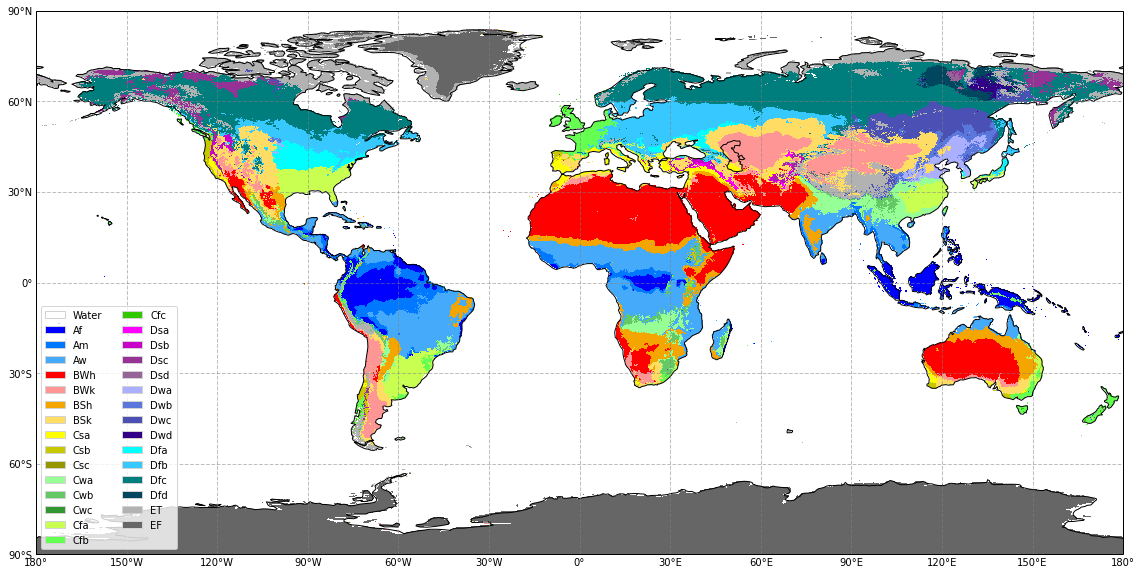

In [39]:
climate.plot_classified_map(basemap=True, bins=bins, colors=colors, labels=labels, suppress_warnings=True,
                           figsize=(20,10), legend_kwargs={'ncol':2, 'loc':3})

Alternatively the legend can be plotted as a colorbar as well if it is blocking information in the figure

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2b92f9b0>,
 <matplotlib.colorbar.Colorbar at 0xb2b8e1320>)

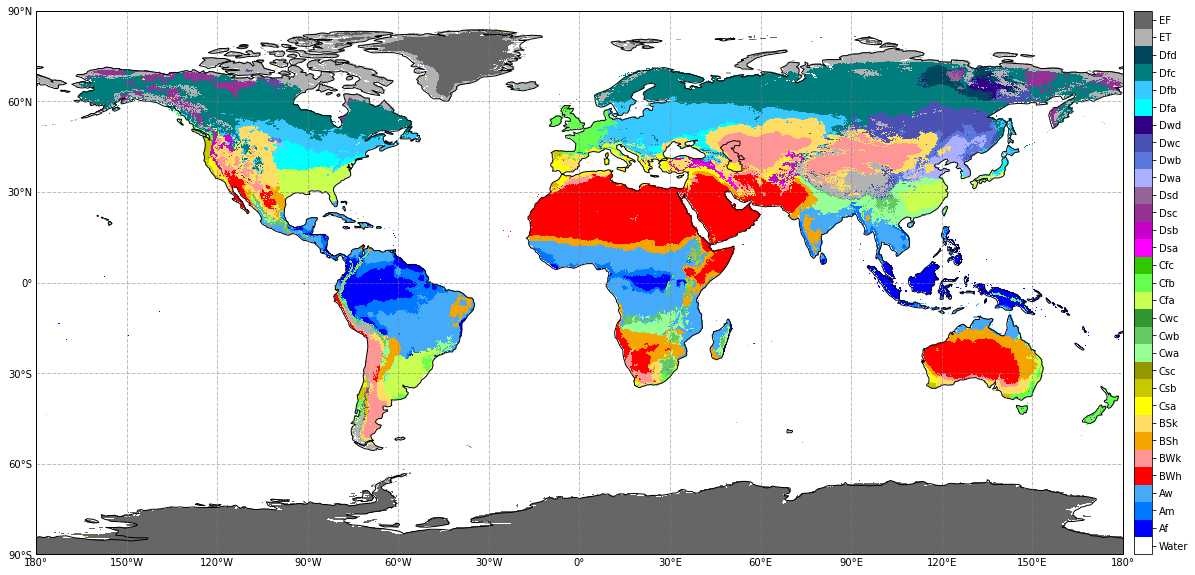

In [40]:
climate.plot_classified_map(basemap=True, figsize=(20,10), bins=bins, colors=colors, labels=labels, 
                            suppress_warnings=True, legend='colorbar')

if you are plotting an area without all classes present, it can be clipped

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2e774a58>,
 <matplotlib.colorbar.Colorbar at 0xb2e631518>)

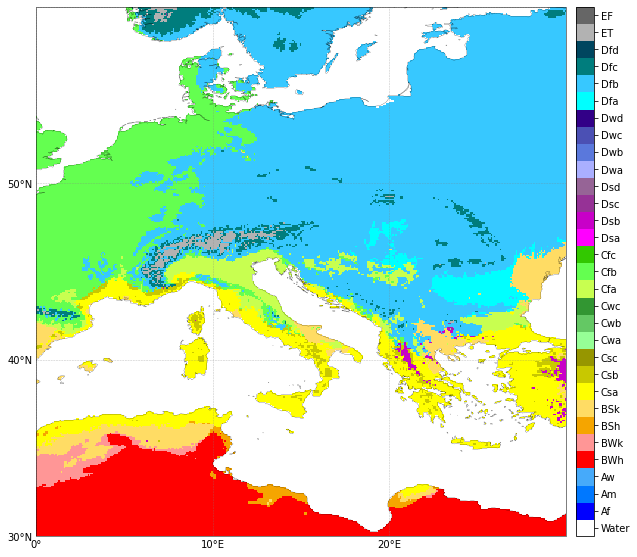

In [41]:
climate.plot_classified_map((0,30,30,60), basemap=True, xticks=10, yticks=10, resolution="10m", 
                            basemap_kwargs={'linewidth':0.5, 'coastline_linewidth':0.2}, bins=bins, 
                            colors=colors, labels=labels, suppress_warnings=True, legend='colorbar')

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2b0fcac8>,
 <matplotlib.colorbar.Colorbar at 0xb2a1fe898>)

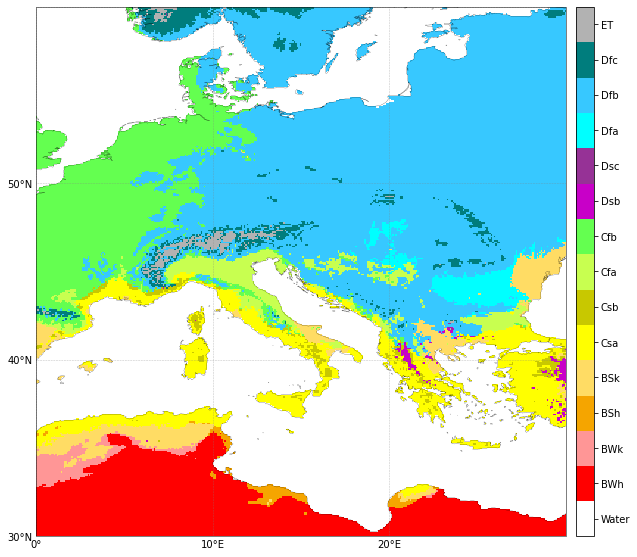

In [42]:
climate.plot_classified_map((0,30,30,60), basemap=True, xticks=10, yticks=10, resolution="10m", 
                            basemap_kwargs={'linewidth':0.5, 'coastline_linewidth':0.2}, bins=bins, 
                            colors=colors, labels=labels, suppress_warnings=True, legend='colorbar',
                            clip_legend=True)

## Plotting shapes

with a similar syntax, based on geopandas, plots can be made

In [43]:
df = gpd.read_file('data/countries/plastic_mobilisation.shp')

(<matplotlib.axes._subplots.AxesSubplot at 0xb2b9444e0>, None)

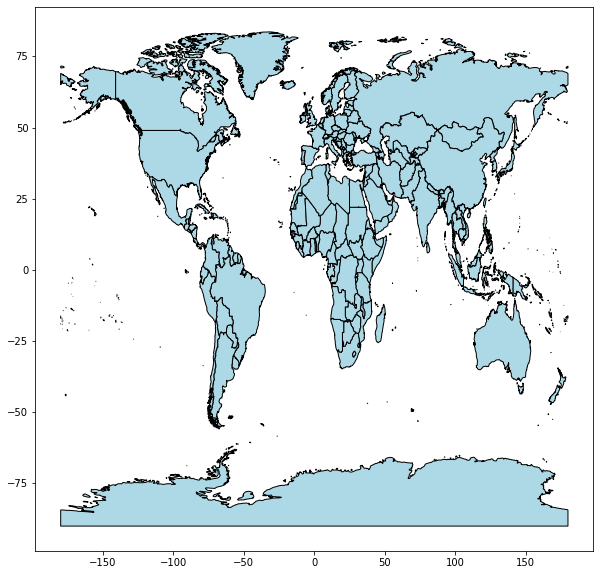

In [44]:
df.plot_shapes(edgecolor='black')

(<matplotlib.axes._subplots.AxesSubplot at 0xb2b089c18>,
 <matplotlib.colorbar.Colorbar at 0xb2a22d9e8>)

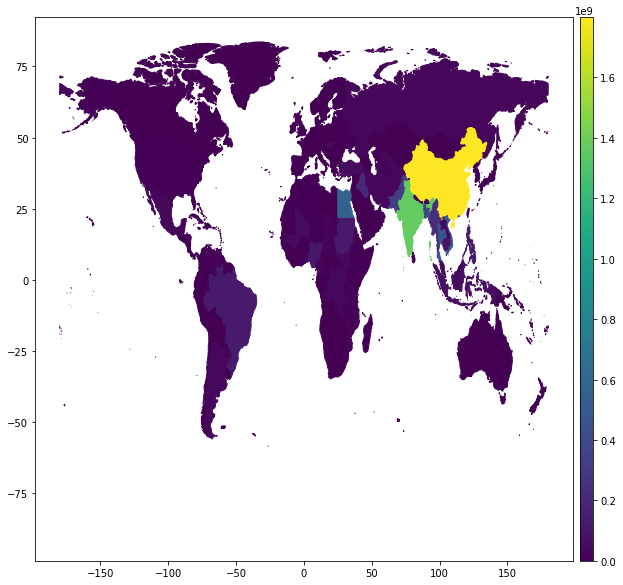

In [45]:
mp.plot_shapes(df=df, values='e_10', aspect=20)

the exact same functionality is exposed through an addon on the GeoDataFrame itself

(<matplotlib.axes._subplots.AxesSubplot at 0xb2a251710>,
 <matplotlib.colorbar.Colorbar at 0xb2b066d68>)

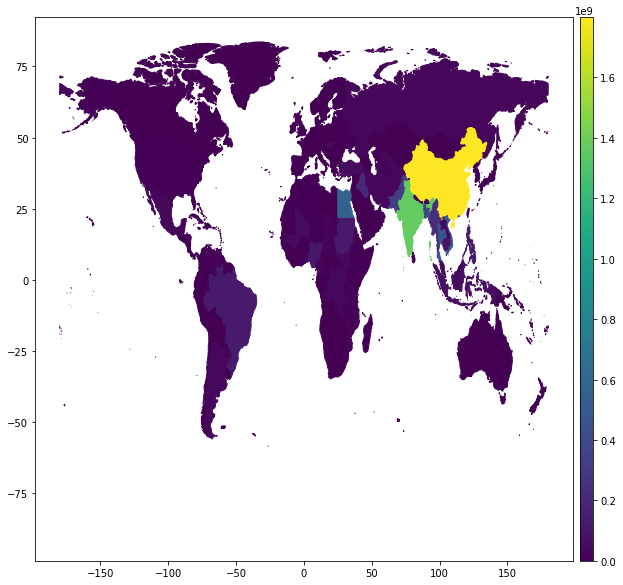

In [46]:
df.plot_shapes(values='e_10', aspect=20)

with a basemap

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2e0469b0>,
 <matplotlib.colorbar.Colorbar at 0xb2b1ca630>)

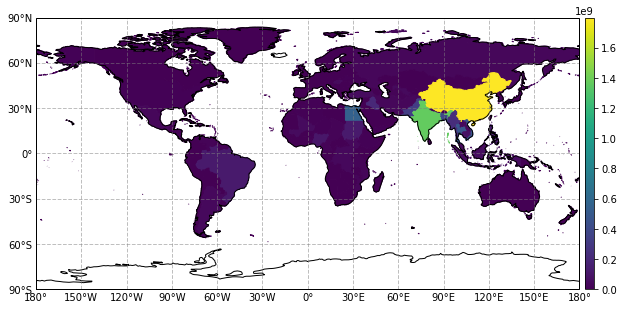

In [47]:
# creating the basemap
ax = mp.basemap(epsg=4326)
# plot the shapes
df.plot_shapes(values='e_10', ax=ax)

which can also be done internally:

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2aee7518>,
 <matplotlib.colorbar.Colorbar at 0xb2a1d9550>)

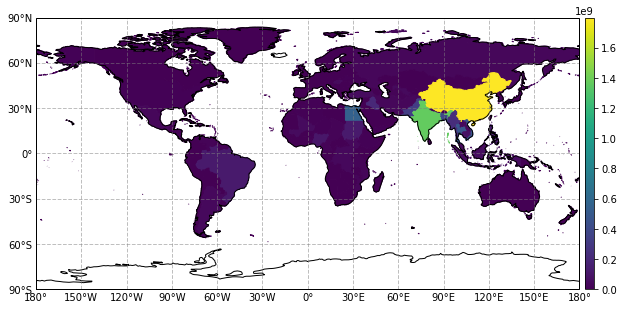

In [48]:
df.plot_shapes(values='e_10', basemap=True, bounds="global")

with a more comprehensive colorscheme and bins like above

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb2b798278>,
 <matplotlib.colorbar.Colorbar at 0xb2aeb3860>)

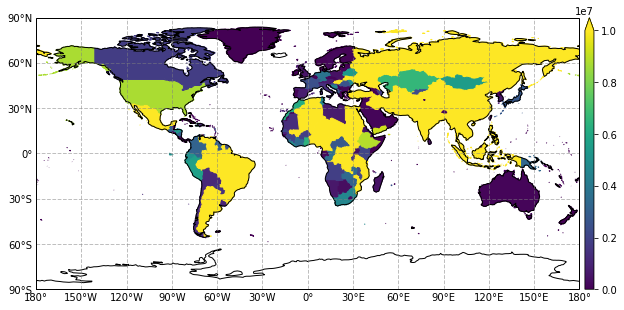

In [49]:
df.plot_shapes(values='e_10', basemap=True, bounds="global", vmax=10000000)

/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1442: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= b] = i
/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1446: RuntimeWarning: invalid value encountered in less
  iret[xx < self.vmin] = -1
/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1447: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= self.vmax] = max_col


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb3077c588>,
 <matplotlib.colorbar.Colorbar at 0xb30edfef0>)

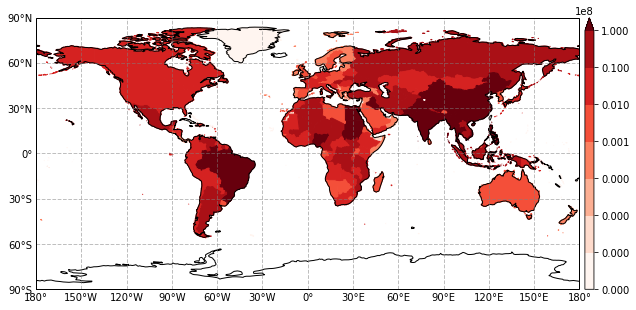

In [50]:
df.plot_shapes(values='e_10', basemap=True, bounds="global", cmap="Reds",
               bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000])

The legend is hardly readible this way. Nicer would be shorten it into E notation

/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1442: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= b] = i
/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1446: RuntimeWarning: invalid value encountered in less
  iret[xx < self.vmin] = -1
/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1447: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= self.vmax] = max_col


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb313a5828>,
 <matplotlib.colorbar.Colorbar at 0xb31d3aac8>)

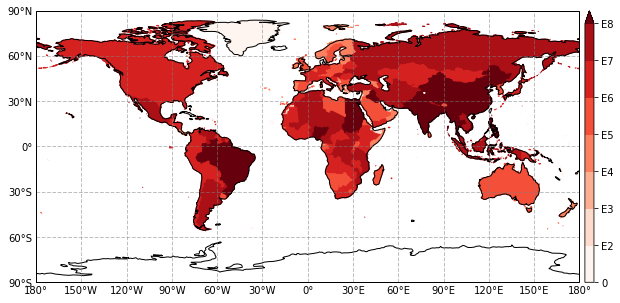

In [51]:
df.plot_shapes(values='e_10', basemap=True, bounds="global", cmap="Reds",
               bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000], 
               bin_labels = [0, "E2", "E3", "E4", "E5", "E6", "E7", "E8"])

This function also accepts ``lat``, ``lon`` and arrays of ``values`` and sizes ``s``. This works only through the standalone version of the function, not the one broadcasted for the GeoDataFrame

# Classified Shapes

In [52]:
df = pd.read_csv("data/processed_data_SDN/df_hm_included.csv", index_col=0)
df_locations = gpd.read_file("data/processed_data_SDN/df_locations.geojson")

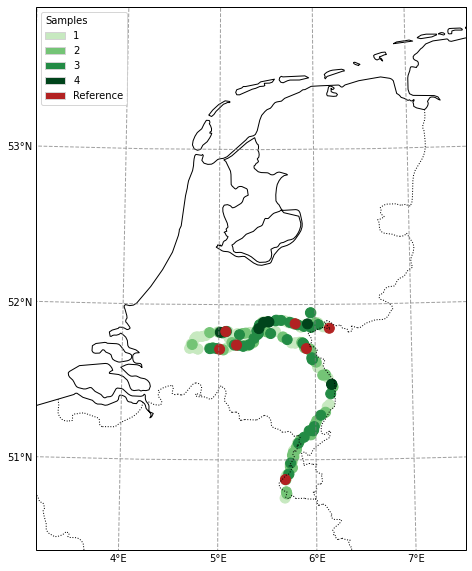

In [53]:
ax = mp.basemap(x0=3.17, x1=7.5, y0=50.4, y1=53.9,
                projection=ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000]),
                resolution='10m', xticks=1, yticks=1, grid_alpha=0.75)
ax.add_feature(
        cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m', facecolor='none', edgecolor='k'),
        label='Stereo', lw=1, linestyle=":")
ax.add_feature(cf.NaturalEarthFeature('physical', 'lakes', '10m', facecolor='none', edgecolor='black'))

temp_df = df_locations.merge(df.groupby("Gebiedscode")['granulaat_korrels'].count(),
                             left_on='Gebiedscode',
                             right_index=True)
temp_df.loc[temp_df.Gebiedscode.str.contains("REFE"), 'granulaat_korrels'] = 5
temp_df = temp_df.sort_values('granulaat_korrels', ascending=True)

ax, legend = temp_df.plot_classified_shapes(values='granulaat_korrels', s=100, ax=ax,
                          colors=mp.cmap_discrete("Greens", 5, return_type='list')[1:].tolist()+["Firebrick"],
                          legend_kwargs={'loc': 2, 'title':"Samples"}, linewidth=1,
                          labels=["1", "2", "3", "4", "Reference"])
legend._legend_box.align = "left"

# Multiple maps

Calling `basemap` while providing an axes will replace the axes completely with a basemap

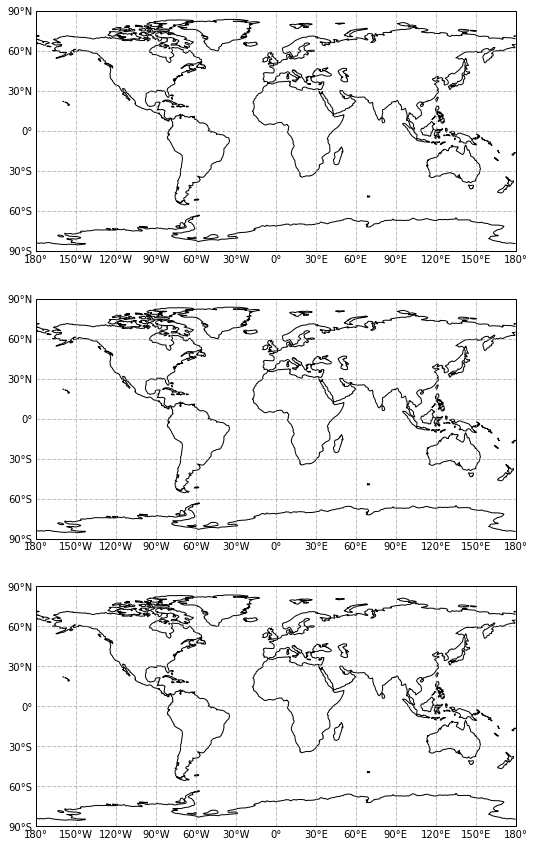

In [54]:
f, ax = plt.subplots(nrows=3, figsize=(15,15))
ax = ax.flatten()
ax = [mp.basemap(ax=cax) for cax in ax]

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0xb323d9a90>,
 <matplotlib.legend.Legend at 0xb326c28d0>)

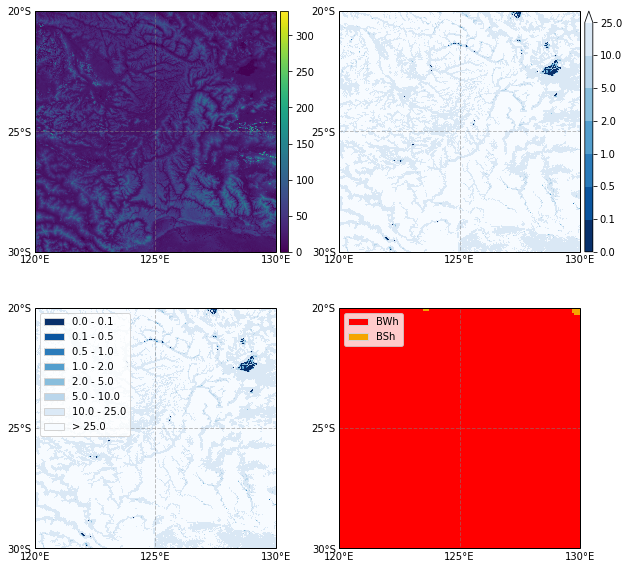

In [55]:
# Note force equal_figsize parameter in the last call. If not provided the axes 
# remains sligthly bigger and consequentially the map is slightly bigger than the others
ind = (120, -30, 130, -20)
f, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
ax = [mp.basemap(*ind, ax=cax, xticks=5, yticks=5) for cax in ax]
data = water_table_depth[ind]
mp.plot_map(data, ax=ax[0])
mp.plot_map(data, ax=ax[1], bins=[0,0.1,0.5,1,2,5,10,25], cmap='Blues_r')
mp.plot_map(data, ax=ax[2], bins=[0,0.1,0.5,1,2,5,10,25], legend='legend', cmap="Blues_r", legend_kwargs={'loc':2},
            force_equal_figsize=True)
mp.plot_classified_map(climate[ind], ax=ax[3], bins=bins, colors=colors, labels=labels, 
                       suppress_warnings=True, force_equal_figsize=True, 
                       legend_kwargs={'ncol':1, 'loc':2}, clip_legend=True)

Please finish the script by closing the file pointers, which can either be done one by one by calling the objects `close` function or it can be done directly on the parent class, to close all at once:

In [56]:
mp.Map.close()


close file: 'data/wtd.tif'
close file: 'data/dis_2019_monthlymeans_cropped_complete.nc'
close file: 'data/climate_downsampled_10_display.tif'
